**Chapter 8.6 p.116-118: ex. 6**

(Computer Experiment.) Let X1, ..., Xn Normal(µ, 1). Let θ = e^µ and let
θ _hat = e^X_bar. Create a data set (using µ = 5) consisting of n=100 observations.

(a) Use the bootstrap to get the se and 95 percent confidence interval
for θ.

(b) Plot a histogram of the bootstrap replications. This is an estimate
of the distribution of θ_hat. Compare this to the true sampling distribution
of θ_hat.

Original θ_hat: 133.774
Standard error of θ_hat (bootstrap): 12.063
95% confidence interval for θ_hat (bootstrap): [111.87276993 159.16503998]


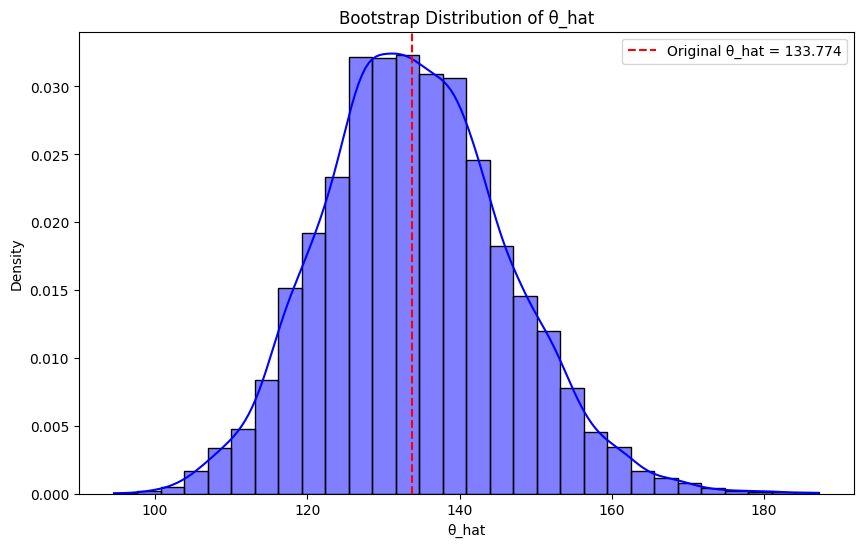

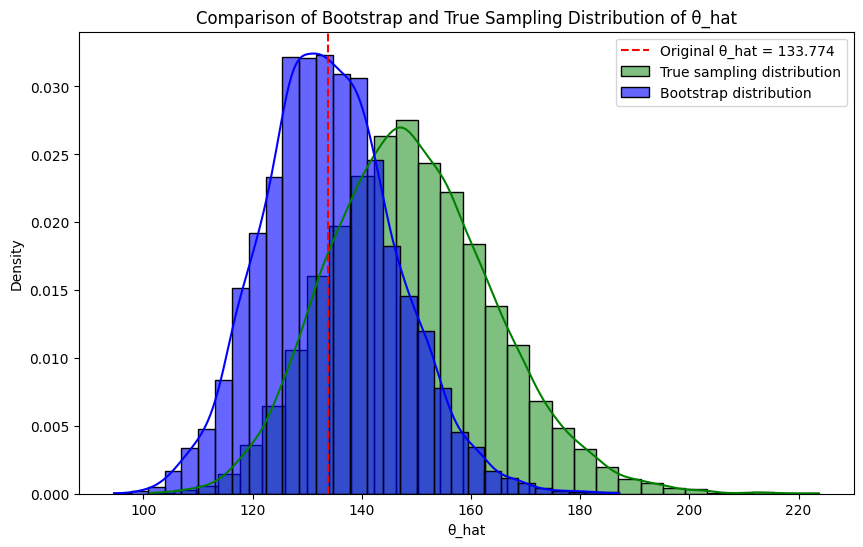

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Parameters
mu = 5  # True mean
n = 100  # Sample size
M = 10000  # Number of bootstrap samples

# Generating the data (X1, ..., Xn ~ N(µ, 1))
data = np.random.normal(mu, 1, n)


# Part A

# Computing the original estimate of θ_hat
X_bar = np.mean(data)
theta_hat = np.exp(X_bar)

# Performing bootstrap simulation
bootstrap_theta_hats = []
for i in range(M):
    # Randomly sampling the data with replacement
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    # Computing the sample mean
    X_bar_bootstrap = np.mean(bootstrap_sample)
    # Computing the bootstrap function
    bootstrap_theta_hats.append(np.exp(X_bar_bootstrap))

bootstrap_theta_hats = np.array(bootstrap_theta_hats)

# Computing the standard error and 95% confidence interval
se_theta_hat = np.std(bootstrap_theta_hats)
ci_95 = np.percentile(bootstrap_theta_hats, [2.5, 97.5])

print(f"Original θ_hat: {theta_hat:.3f}")
print(f"Standard error of θ_hat (bootstrap): {se_theta_hat:.3f}")
print(f"95% confidence interval for θ_hat (bootstrap): {ci_95}")


#Part B

# Plotting the histogram of bootstrap replications
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_theta_hats, bins=30, kde=True, color='blue', stat='density')
plt.axvline(theta_hat, color='red', linestyle='--', label=f'Original θ_hat = {theta_hat:.3f}')
plt.title('Bootstrap Distribution of θ_hat')
plt.xlabel('θ_hat')
plt.ylabel('Density')
plt.legend()
plt.show()

# The true distribution of θ_hat is approximately log-normal because θ_hat = exp(X_bar)
# E[X_bar] = 1/n * (n*E[X]) = E[X] = µ
# Var[X_bar] = 1/n^2 * (n*Var[X]) = 1/n * 1 = 1/n
# X_bar is normally distributed as N(µ, 1/n), and exp(Normal) is log-normal

# Parameters
mu_true = np.exp(mu)  # True θ value
sigma_true = np.sqrt(1 / n)  # Standard deviation of the sample mean

# Generating samples from the true log-normal distribution
true_theta_hats = np.random.lognormal(mean=np.log(mu_true), sigma=sigma_true, size=M)

# Ploting the true sampling distribution vs. bootstrap distribution
plt.figure(figsize=(10, 6))
sns.histplot(true_theta_hats, bins=30, kde=True, color='green', label='True sampling distribution', stat='density')
sns.histplot(bootstrap_theta_hats, bins=30, kde=True, color='blue', label='Bootstrap distribution', stat='density', alpha=0.6)
plt.axvline(theta_hat, color='red', linestyle='--', label=f'Original θ_hat = {theta_hat:.3f}')
plt.title('Comparison of Bootstrap and True Sampling Distribution of θ_hat')
plt.xlabel('θ_hat')
plt.ylabel('Density')
plt.legend()
plt.show()